## <mark>1994년도~2024학년도 대학수학능력시험 연도별 접수 현황을 바탕으로 한 통계적 분석</mark>
### <mark>A statistical analysis based on the annual status of applications for CSAT from 1994 to 2024</mark>

<br>
<br>

- **<mark>임규연 (가천대학교 컴퓨터공학부 학부과정)</mark>**
    - e-mail : lky473736@icloud.com
    - GitHub : https://github.com/lky473736
    - Homepage : https://lky473736.github.io/
    - 관심 분야 : 머신러닝, 최적화알고리즘, 선형대수, 교육공학

<br>

- **프로젝트 진행 기간** : 2024.07.05. ~ 2024.07.06. (빅데이터분석개론 (2024년 여름계절학기 / 최진우 교수님))
- **키워드** : 대학수학능력시험, 대수능, n수생, 저출산, 교육열


<br>
<div style="text-align : center"><h3>- abstract - </h3></div>

```
Based on the file 'Yearly Application Status for the College Scholastic Ability Test from 1994 to 2024', we will analyze the current state of education for teenagers in South Korea and the trends in College Scholastic Ability Test (CSAT) applicants. The analysis will focus on the decreasing total number of students and the increasing proportion of applicants who are GED holders and graduates. We will apply linear regression to predict future trends based on this data.
```
<br>

-------

### <mark>1. 데이터 개요 및 선정 이유</mark>

공공데이터포탈에서 제공하는 '한국교육과정평가원 대학수학능력시험 연도별 접수현황 (2024. 01. 24)' 데이터를 활용하여, 시계열에 따른 대학수학능력시험(이하 대수능) 접수 양상을 파악하고, 각 사회에서 이슈가 되고 있는 주제를 분석한다. 저출산으로 인한 수능 접수자의 감소, n수생의 대거 투입으로 인한 생태계 양란 등을 시각화 및 linear regression 적용으로 확인한다. attributes 별로 추후 대수능 접수 추이를 prediction한다.

- **데이터 이름** : 한국교육과정평가원_대학수학능력시험 연도별 접수현황 (https://www.data.go.kr/data/15098903/fileData.do)
- **데이터 공시 일자** : 2024.01.24
- **데이터의 시계열 범위** : 1994 ~ 2024년도 (1년 단위)
- **데이터의 속성값** : 접수 기간, 총계, 남, 여, 인문, 자연, 예체능, 재학생, 졸업생, 검정등, 3개 이하 검정수수료 등

본 모델을 구현할 테크는 아래와 같다.

- **데이터 읽기 및 전처리 테크닉** : pandas
- **모델링 및 머신러닝 라이브러리** : scikit-learn
- **선형대수학 및 tensor 이용** : numpy
- **데이터 시각화** : matplotlib, seaborn

데이터 분석은 아래와 같은 단계로 진행된다.

- **1) 데이터 구조 파악 및 전처리, 시각화**
    - 데이터의 구조 및 기초 통계량 확인, 특정 attribute에 대한 간단한 시각화를 진행한다.
- **2) linear regression 모델을 적용하여 추후 상황 예측**
    - dataframe에서 특정 series만 추출하여 회귀를 진행, 앞으로의 추이를 예측한다.

In [296]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import numpy as np

-----------

### <mark>2. 데이터 구조 파악 및 전처리, 시각화 </mark>
- 2024.07.05. 
- 본 단계에서는 데이터의 기초적인 통계량 파악, 데이터 전처리 및 각 attribute에 대한 시각화를 진행한다.

In [297]:
# pandas로 csv 모집단 데이터를 읽는다

data = pd.read_csv ('한국교육과정평가원_대학수학능력시험 연도별 접수현황.csv', encoding='cp949')
data.head()

,학년도,기간(1),기간(2),총 계,남,여,인문,자연,예체능,재학생,졸업생,검정등,3개 영역 이하 응시수수료,4개 영역 응시수수료,5개 영역 응시수수료,6개 영역 응시수수료
0,1994,1993-06-11~06-24,(14일간),742668,437465,305203,336941.0,340252.0,65475.0,521806,213459,7403,12000,12000,12000,NaN
1,1994,1993-10-02~10-11,(14일간),750181,444612,305569,342555.0,343168.0,64458.0,496617,243826,9738,12000,12000,12000,NaN
2,1995,1994-09-12~09-27,(16일간),781749,452360,329389,372311.0,336390.0,73048.0,477960,261492,42297,12000,12000,12000,NaN
3,1996,1995-09-11~09-23,(13일간),840661,478707,361954,413958.0,351719.0,74984.0,526833,300482,13346,12000,12000,12000,NaN
4,1997,1996-09-02~09-14,(13일간),824374,472527,351847,393295.0,356560.0,74519.0,545023,268044,11307,12000,12000,12000,NaN


In [298]:
# 위 데이터의 행과 열의 갯수를 출력한다

print ("rows, columns : {0}, {1}".format(len(data), data.shape[1]))

# 맨 위 header을 제외한다면 총 row 갯수는 32, column 갯수는 16으로 확인 가능하다.

rows, columns : 32, 16


In [299]:
# 각 데이터의 기본적인 통계량을 확인한다. 

data.describe()

,학년도,총 계,남,여,인문,자연,예체능,재학생,졸업생,검정등,3개 영역 이하 응시수수료,4개 영역 응시수수료,5개 영역 응시수수료,6개 영역 응시수수료
count,32.000000,32.000000,32.000000,32.000000,12.000000,12.000000,12.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,8.0
mean,2008.531250,673492.812500,362192.718750,311300.093750,400401.583333,302630.583333,92902.916667,482700.218750,176858.625000,13933.968750,28656.250000,30531.250000,33656.250000,47000.0
std,9.329054,118472.653322,75337.195204,45919.399283,46453.766859,65744.623808,24019.909123,78724.255497,52849.176948,5567.480993,10917.902951,12474.449694,14859.795021,0.0
min,1994.000000,493434.000000,254027.000000,239407.000000,336941.000000,198963.000000,64458.000000,326646.000000,126729.000000,7403.000000,12000.000000,12000.000000,12000.000000,47000.0
25%,2000.750000,592370.000000,311660.750000,278571.500000,364669.500000,245269.250000,74151.250000,442539.250000,135391.500000,11587.250000,18750.000000,18750.000000,18750.000000,47000.0
50%,2008.500000,659634.500000,349597.000000,307410.500000,403626.500000,338321.000000,88859.000000,482071.500000,153274.000000,13270.500000,37000.000000,37000.000000,42000.000000,47000.0
75%,2016.250000,744546.250000,439251.750000,330252.250000,426833.250000,347981.750000,108771.500000,528233.750000,218567.500000,14365.000000,37000.000000,42000.000000,47000.000000,47000.0
max,2024.000000,896122.000000,495179.000000,412520.000000,481027.000000,375023.000000,134662.000000,631745.000000,300482.000000,42297.000000,37000.000000,42000.000000,47000.000000,47000.0


위 기본통계량을 확인하면 아래와 같은 정보를 파악 가능하다.

- **접수자 수 추이**
    - 총 접수자 수의 평균은 약 673,493명이며, 최저치는 493,434명, 최고치는 896,122명
    - 접수자 수의 표준편차가 118,473명으로, 연도에 따라 변동이 있음을 알 수 있다 (상관관계 조사 시 확인 예정)
- **성별 접수자 수**
    - 남성 접수자의 평균은 약 362,193명, 여성 접수자의 평균은 약 311,300명으로, 남성 접수자 수가 더 많다 
    - 남성 접수자 수의 범위는 254,027명에서 495,179명까지, 여성 접수자 수의 범위는 239,407명에서 412,520명까지이다
- **인문, 자연, 예체능 계열 접수자 수**
    - 인문계열 접수자 수의 평균은 약 400,402명, 자연계열은 약 302,631명, 예체능 계열은 약 92,903명이다
    - 인문계열과 자연계열의 접수자 수는 12개 연도에 대해서만 제공되었기 때문에, 추후 seaborn을 이용한 상관관계 확인 시 전체 데이터를 비교해야 하므로 이 부분을 유의하여 전처리하여야 할 것이다
- **접수자 구분**
    - 재학생 접수자 수는 평균 약 482,700명, 졸업생 접수자 수는 약 176,859명, 검정고시 접수자 수는 약 13,934명
    - 재학생과 졸업생 접수자 수의 범위는 각각 326,646명에서 631,745명, 126,729명에서 300,482명

위와 같은 항목을 보았을 때, 아래와 같은 주제를 시사할 수 있다.

- **시사점**
    - **접수자 수 감소**
        - 전반적으로 접수자 수는 시간이 지남에 따라 감소하는 추세를 보일 가능성이 있다. 이는 출생률 감소와 관련이 있을 수 있다.
    - **성별 접수자 비율**
        - 남성 접수자 수가 여성보다 많으며, 이는 학과 선택과 관련된 성별 차이, 입시 전략 등의 다양한 요인에 기인할 수 있다.
    - **계열별 접수자 수**
        - 인문계열과 자연계열의 접수자 수는 상당히 높지만 예체능 계열의 접수자 수는 상대적으로 적다. 이는 예체능 계열의 특성상 대학 입시에서의 비중이 적기 때문일 수 있다.
    - **접수자 구분**
        - 재학생 접수자 수가 졸업생 및 검정고시 접수자 수보다 많지만, 졸업생 접수자 수 역시 상당히 높은 편이다. 이는 n수생의 대수능 난립 등의 영향으로 보인다.
    - **접수 수수료 변화**
        - 수수료는 점차 증가하는 경향을 보이며, 이는 물가 상승이나 시험 운영 비용 증가와 관련이 있을 수 있다.


In [300]:
# 결측값을 확인한다
# dataframe 전체에 isnull()을 사용하여 결측치의 위치를 파악한다

header = data.columns.to_list()
print ('header : ', header)
data.isnull() # 결측치가 존재하면 True를 반환함

header :  ['학년도', '기간(1)', '기간(2)', '총 계', '남', '여', '인문', '자연', '예체능', '재학생', '졸업생', '검정등', '3개 영역 이하 응시수수료', '4개 영역 응시수수료', '5개 영역 응시수수료', '6개 영역 응시수수료']


,학년도,기간(1),기간(2),총 계,남,여,인문,자연,예체능,재학생,졸업생,검정등,3개 영역 이하 응시수수료,4개 영역 응시수수료,5개 영역 응시수수료,6개 영역 응시수수료
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [301]:
'''
위 데이터 중 '6개 영역 응시 추가 수수료' series는 제거한다. 
그에 대한 까닭은, 6개 영역은 대수능 응시 필수 과목인 국어, 수학, 영어, 그리고 선택 과목인 탐구 2과목 이외의 제2외국어 과목이 들어가 
학생들마다 응시 여부가 각각 다르기 떄문에 분석에 적합하지 않다.

또한 기간 (1), 기간 (2) 또한 제거한다. 실질적으로 사용되지 않는다. 
'''

# 데이터 분석 시에 필요하지 않은 '6개 영역 응시수수료' series는 제거한다.

del data['6개 영역 응시수수료']
del data['기간(1)']
del data['기간(2)']
header = data.columns.to_list() # 제거 후 새로 header 업데이트
print (header)

['학년도', '총 계', '남', '여', '인문', '자연', '예체능', '재학생', '졸업생', '검정등', '3개 영역 이하 응시수수료', '4개 영역 응시수수료', '5개 영역 응시수수료']


본 과정에서는 아래와 같은 주제로 시각화를 진행할 것이다.

- 1) 1994년도 ~ 2004년도 인문, 자연, 예체능 접수자 추이를 bar plot, pie plot 표현
- 2) 시계열에 따른 재학생, 졸업생, 검정등 추이, 전체 접수자 수를 line plot 표현
- 3) 각 특징들에 따른 상관관계 (corr) 확인

* 3번째 시각화를 하기 전, 인문, 자연, 예체능 series에 대한 결측치를 평균으로 변경할 예정

In [302]:
# 먼저, pyplot을 그릴 때 한글을 사용하면 encoding error가 나는 상황을 방지하기 위하여
# 아래 코드를 구성

from matplotlib import font_manager, rc
import matplotlib

print (matplotlib.matplotlib_fname()) # matplotlib 패키지 위치
print (matplotlib.get_cachedir()) # cache 디렉토리 경로

# 한글 폰트 설정
font_path = './NanumGothic.ttf' # 나눔고딕 사용
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/mpl-data/matplotlibrc
/Users/alphastation/.matplotlib


#### <mark>1-1) 1994년도 ~ 2004년도 인문, 자연, 예체능 접수자 추이를 bar plot, pie plot 표현</mark>
- 연도별 인문, 자연, 예체능 접수자 수를 파악하기 위하여 bar plot을 그린다.
- 인문, 자연, 예체능 접수자를 각각 총합하여 pie plot으로 표현한다.
- 각 영역 사이의 비율을 확인한다.
* 1994년도 ~ 2004년도 이후의 각 접수자 수는 결측치이므로 슬라이싱을 통하여 제거한다.

In [303]:
# 1994년도 ~ 2004년도 각 인문, 자연, 예체능 tuple을 추출한다.
# 1994년도에는 대수능이 2번 치뤄졌기 때문에 연도 series에 1994 추가한다.

year = pd.Series([1994] + [year for year in range(1994, 2005)]) # 연도 (학년도)
humanities = data[(data['학년도'] >= 1994) & (data['학년도'] < 2005)]['인문'] # 인문
natural_sciences = data[(data['학년도'] >= 1994) & (data['학년도'] < 2005)]['자연'] # 자연
arts_physical = data[(data['학년도'] >= 1994) & (data['학년도'] < 2005)]['예체능'] # 예체능

humanities = pd.DataFrame({'연도' : year, '인문' : humanities})
natural_sciences = pd.DataFrame({'연도' : year, '자연' : natural_sciences})
arts_physical = pd.DataFrame({'연도' : year, '예체능' : arts_physical})

humanities, natural_sciences, arts_physical

(      연도        인문
 0   1994  336941.0
 1   1994  342555.0
 2   1995  372311.0
 3   1996  413958.0
 4   1997  393295.0
 5   1998  428064.0
 6   1999  426423.0
 7   2000  466651.0
 8   2001  481027.0
 9   2002  416700.0
 10  2003  365892.0
 11  2004  361002.0,
       연도        자연
 0   1994  340252.0
 1   1994  343168.0
 2   1995  336390.0
 3   1996  351719.0
 4   1997  356560.0
 5   1998  375023.0
 6   1999  346736.0
 7   2000  310105.0
 8   2001  256608.0
 9   2002  198963.0
 10  2003  204790.0
 11  2004  211253.0,
       연도       예체능
 0   1994   65475.0
 1   1994   64458.0
 2   1995   73048.0
 3   1996   74984.0
 4   1997   74519.0
 5   1998   82234.0
 6   1999   95484.0
 7   2000  119366.0
 8   2001  134662.0
 9   2002  123466.0
 10  2003  105240.0
 11  2004  101899.0)

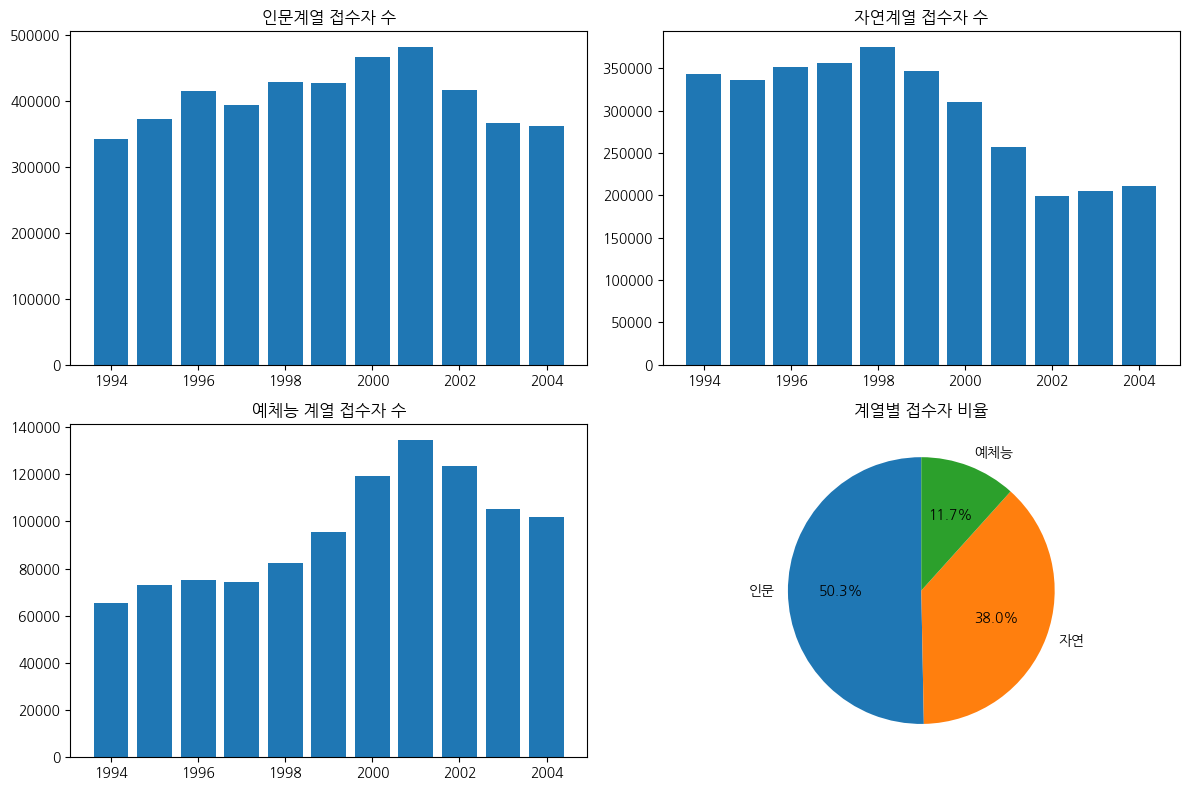

In [304]:
# bar plot, pie plot
# 아래는 subplot을 구성하여 2 by 2으로 표현
# 1행 1열, 2열, 2행 1열에는 bar plot (순서대로 인문, 자연, 예체능)
# 2행 2열에는 pie plot

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Bar plots
axs[0, 0].bar(humanities['연도'], humanities['인문'])
axs[0, 0].set_title('인문계열 접수자 수')

axs[0, 1].bar(natural_sciences['연도'], natural_sciences['자연'])
axs[0, 1].set_title('자연계열 접수자 수')

axs[1, 0].bar(arts_physical['연도'], arts_physical['예체능'])
axs[1, 0].set_title('예체능 계열 접수자 수')

# pie plot을 표현하기 전, 각 영역 접수자의 총합을 구한다
humanities_all = humanities['인문'].sum()
natural_sciences_all = natural_sciences['자연'].sum()
arts_physical_all = arts_physical['예체능'].sum()

labels = ['인문', '자연', '예체능']
sizes = [humanities_all, natural_sciences_all, arts_physical_all]

axs[1, 1].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
axs[1, 1].set_title('계열별 접수자 비율')

plt.tight_layout()
plt.show()

위 시각화를 바탕으로 아래와 같은 정보를 얻고 원인을 이와 같이 추론할 수 있다.
- 인문계열 접수자 수는 다른 계열에 비해 변동 폭이 작다.
- 자연계열 접수자 수는 1998년도 ~ 2001년도에 하락하였으나, 2002년도부터 다시 상승한다.
    - 1998년부터 2001년에 하락한 것은 IMF 외환위기의 영향으로 취업이 어려운 자연계열 전공보다는 인문계열 전공을 선호하는 경향이 나타난 것으로 해석된다.
- 예체능계열 접수자 수는 1994년도 ~ 2001년도에 폭발적으로 상승하였다.
    - 대한민국의 경제 성장과 함께 문화 산업이 발전하면서, 예체능 분야에 대한 관심이 증가한 시기이기 때문에 폭발적인 상승이 잇따랐다고 생각한다.
- 전체적으로 인문계열이 50.3%으로 전체 접수자의 약 1/2을 차지한다.


#### <mark>1-2) 시계열에 따른 재학생, 졸업생, 검정등, 전체 접수자 수 추이를 line plot 표현</mark>
- 재학생 접수자 수, 졸업생 접수자 수, 검정등 접수자 수, 전체 접수자 수를 line plot으로 표현하여 수의 변동양상을 시각적으로 확인한다
- x축을 시계열 (학년도), y축을 도수로 설정한다

In [305]:
# 모든 연도의 재학생, 졸업생, 검정등, 전체 접수자 수를 추출한다. 

year = data['학년도']
current = data['재학생'] # 재학생
graduate = data['졸업생'] # 졸업생
GED = data['검정등'] # 검정등
total = data['총 계'] # 전체 접수자 수

print (year)

0     1994
1     1994
2     1995
3     1996
4     1997
5     1998
6     1999
7     2000
8     2001
9     2002
10    2003
11    2004
12    2005
13    2006
14    2007
15    2008
16    2009
17    2010
18    2011
19    2012
20    2013
21    2014
22    2015
23    2016
24    2017
25    2018
26    2019
27    2020
28    2021
29    2022
30    2023
31    2024
Name: 학년도, dtype: int64


In [306]:
# 위 year을 보았을 때 index 0, 1에 1994가 2개 있다. 이는 1994년에 대수능을 2번 치루었기에 그렇다. 
# 따라서 index 0과 index 1에 위치한 두 records를 하나로 병합한다. 
# temp 변수를 만들어 index 0에 위치한 원소와 1에 위치한 원소를 더한 후 index 0을 지운 후에 index 1의 자리에 temp을 대입한다

# 학년도
year.drop(0, inplace=True)

# 재학생
current.iloc[1] = current.iloc[0] + current.iloc[1]
current = current.drop(current.index[0]).reset_index(drop=True)

# 졸업생
graduate.iloc[1] = graduate.iloc[0] + graduate.iloc[1]
graduate = graduate.drop(graduate.index[0]).reset_index(drop=True)

# 검정등
GED.iloc[1] = GED.iloc[0] + GED.iloc[1]
GED = GED.drop(GED.index[0]).reset_index(drop=True)

# 전체 접수자 수
total.iloc[1] = total.iloc[0] + total.iloc[1]
total = total.drop(total.index[0]).reset_index(drop=True)

/var/folders/_z/gryfr07n59jgb3wrd062h1ym0000gn/T/ipykernel_8347/802083385.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current.iloc[1] = current.iloc[0] + current.iloc[1]
/var/folders/_z/gryfr07n59jgb3wrd062h1ym0000gn/T/ipykernel_8347/802083385.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graduate.iloc[1] = graduate.iloc[0] + graduate.iloc[1]
/var/folders/_z/gryfr07n59jgb3wrd062h1ym0000gn/T/ipykernel_8347/802083385.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

In [307]:
print (year.shape, current.shape, graduate.shape, GED.shape, total.shape)

(31,) (31,) (31,) (31,) (31,)


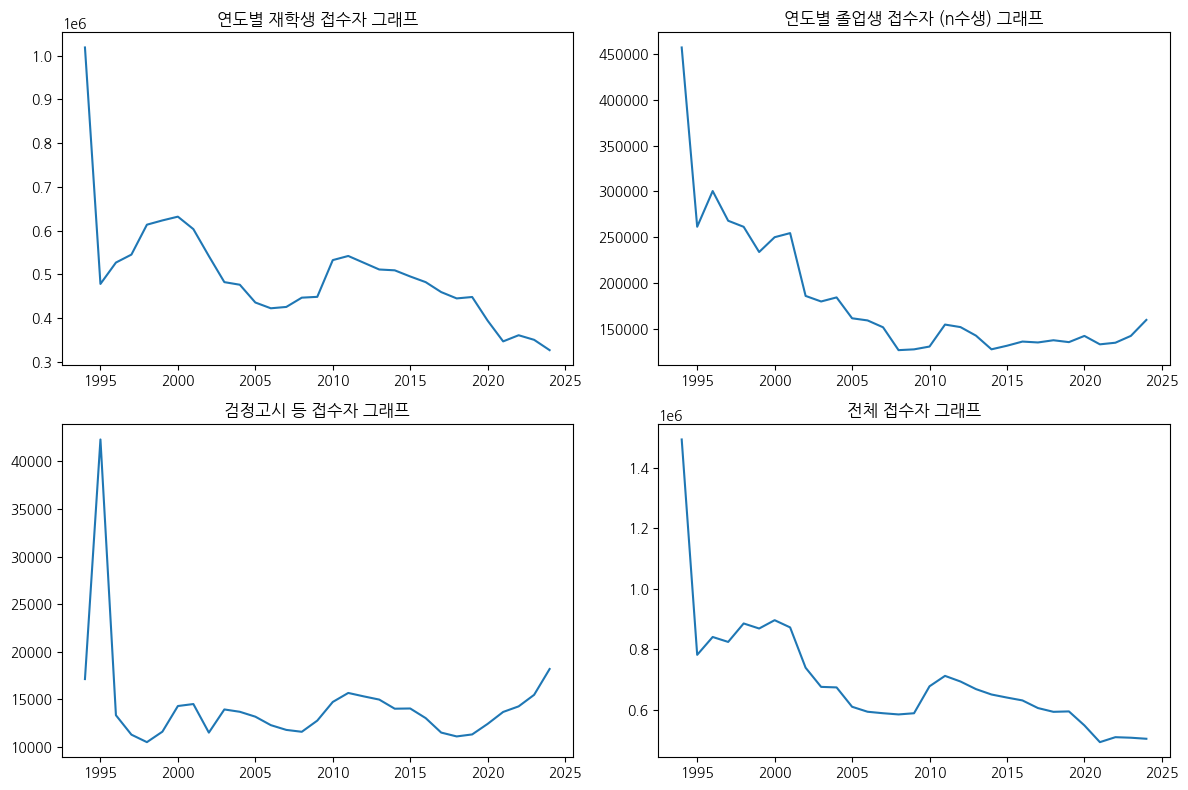

In [308]:
# line plot
# 아래는 subplot을 구성하여 2 by 2으로 표현
# 1행 1열은 재학생 접수자 수 line plot, 1행 2열은 졸업생 접수자 수 line plot
# 2행 1열은 검정등 추이 수 line plot, 2행 2열은 전체 접수자 수 line plot

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Line plots
axs[0, 0].plot(year, current)
axs[0, 0].set_title('연도별 재학생 접수자 그래프')

axs[0, 1].plot(year, graduate)
axs[0, 1].set_title('연도별 졸업생 접수자 (n수생) 그래프')

axs[1, 0].plot(year, GED)
axs[1, 0].set_title('검정고시 등 접수자 그래프')

axs[1, 1].plot(year, total)
axs[1, 1].set_title('전체 접수자 그래프')

plt.tight_layout()
plt.show()

위 시각화를 바탕으로 아래와 같은 정보를 얻고 원인을 이와 같이 추론할 수 있다.
- 연도별 재학생, 졸업생(n수생), 검정고시 등 접수자는 큰 폭으로 줄어들고 있음이 파악 가능하다.
    - 대한민국의 저출산 문제가 이의 원인으로 보여지며, 전체 접수자 그래프 또한 폭발적 하향을 보이고 있다.
- 재학생 접수자는 줄어들고 있는 방면, 검정고시 등 접수자 및 졸업생(n수생) 접수자가 소폭적인 상향을 하고 있음을 확인 가능하다.
    - 2024년도 수능은 역대 가장 많은 n수생이 지원하는 수능이다. 
    - 점차 재학생 이외의 접수자가 늘어나면서 대수능 취지에 맞지 않는 난립이 예상된다.


#### <mark>1-3) 각 특징들에 따른 상관관계 (corr) 확인</mark>
- attribute들 간의 상관관계를 확인하기 위해 seaborn 라이브러리를 사용한다
- 사용하기 전, 결측치를 제거한다

In [309]:
# 결측치 제거
# 초반에 data.isnull() 명령어를 통하여 '인문', '자연', '예체능' series의 index 12~31가 전부 결측치임을 확인하였다
# 따라서 null에 해당되는 부분은 그 열의 평균을 삽입할 것

data['인문'] = data['인문'].fillna(data['인문'].mean())
data['자연'] = data['자연'].fillna(data['자연'].mean())
data['예체능'] = data['예체능'].fillna(data['예체능'].mean())

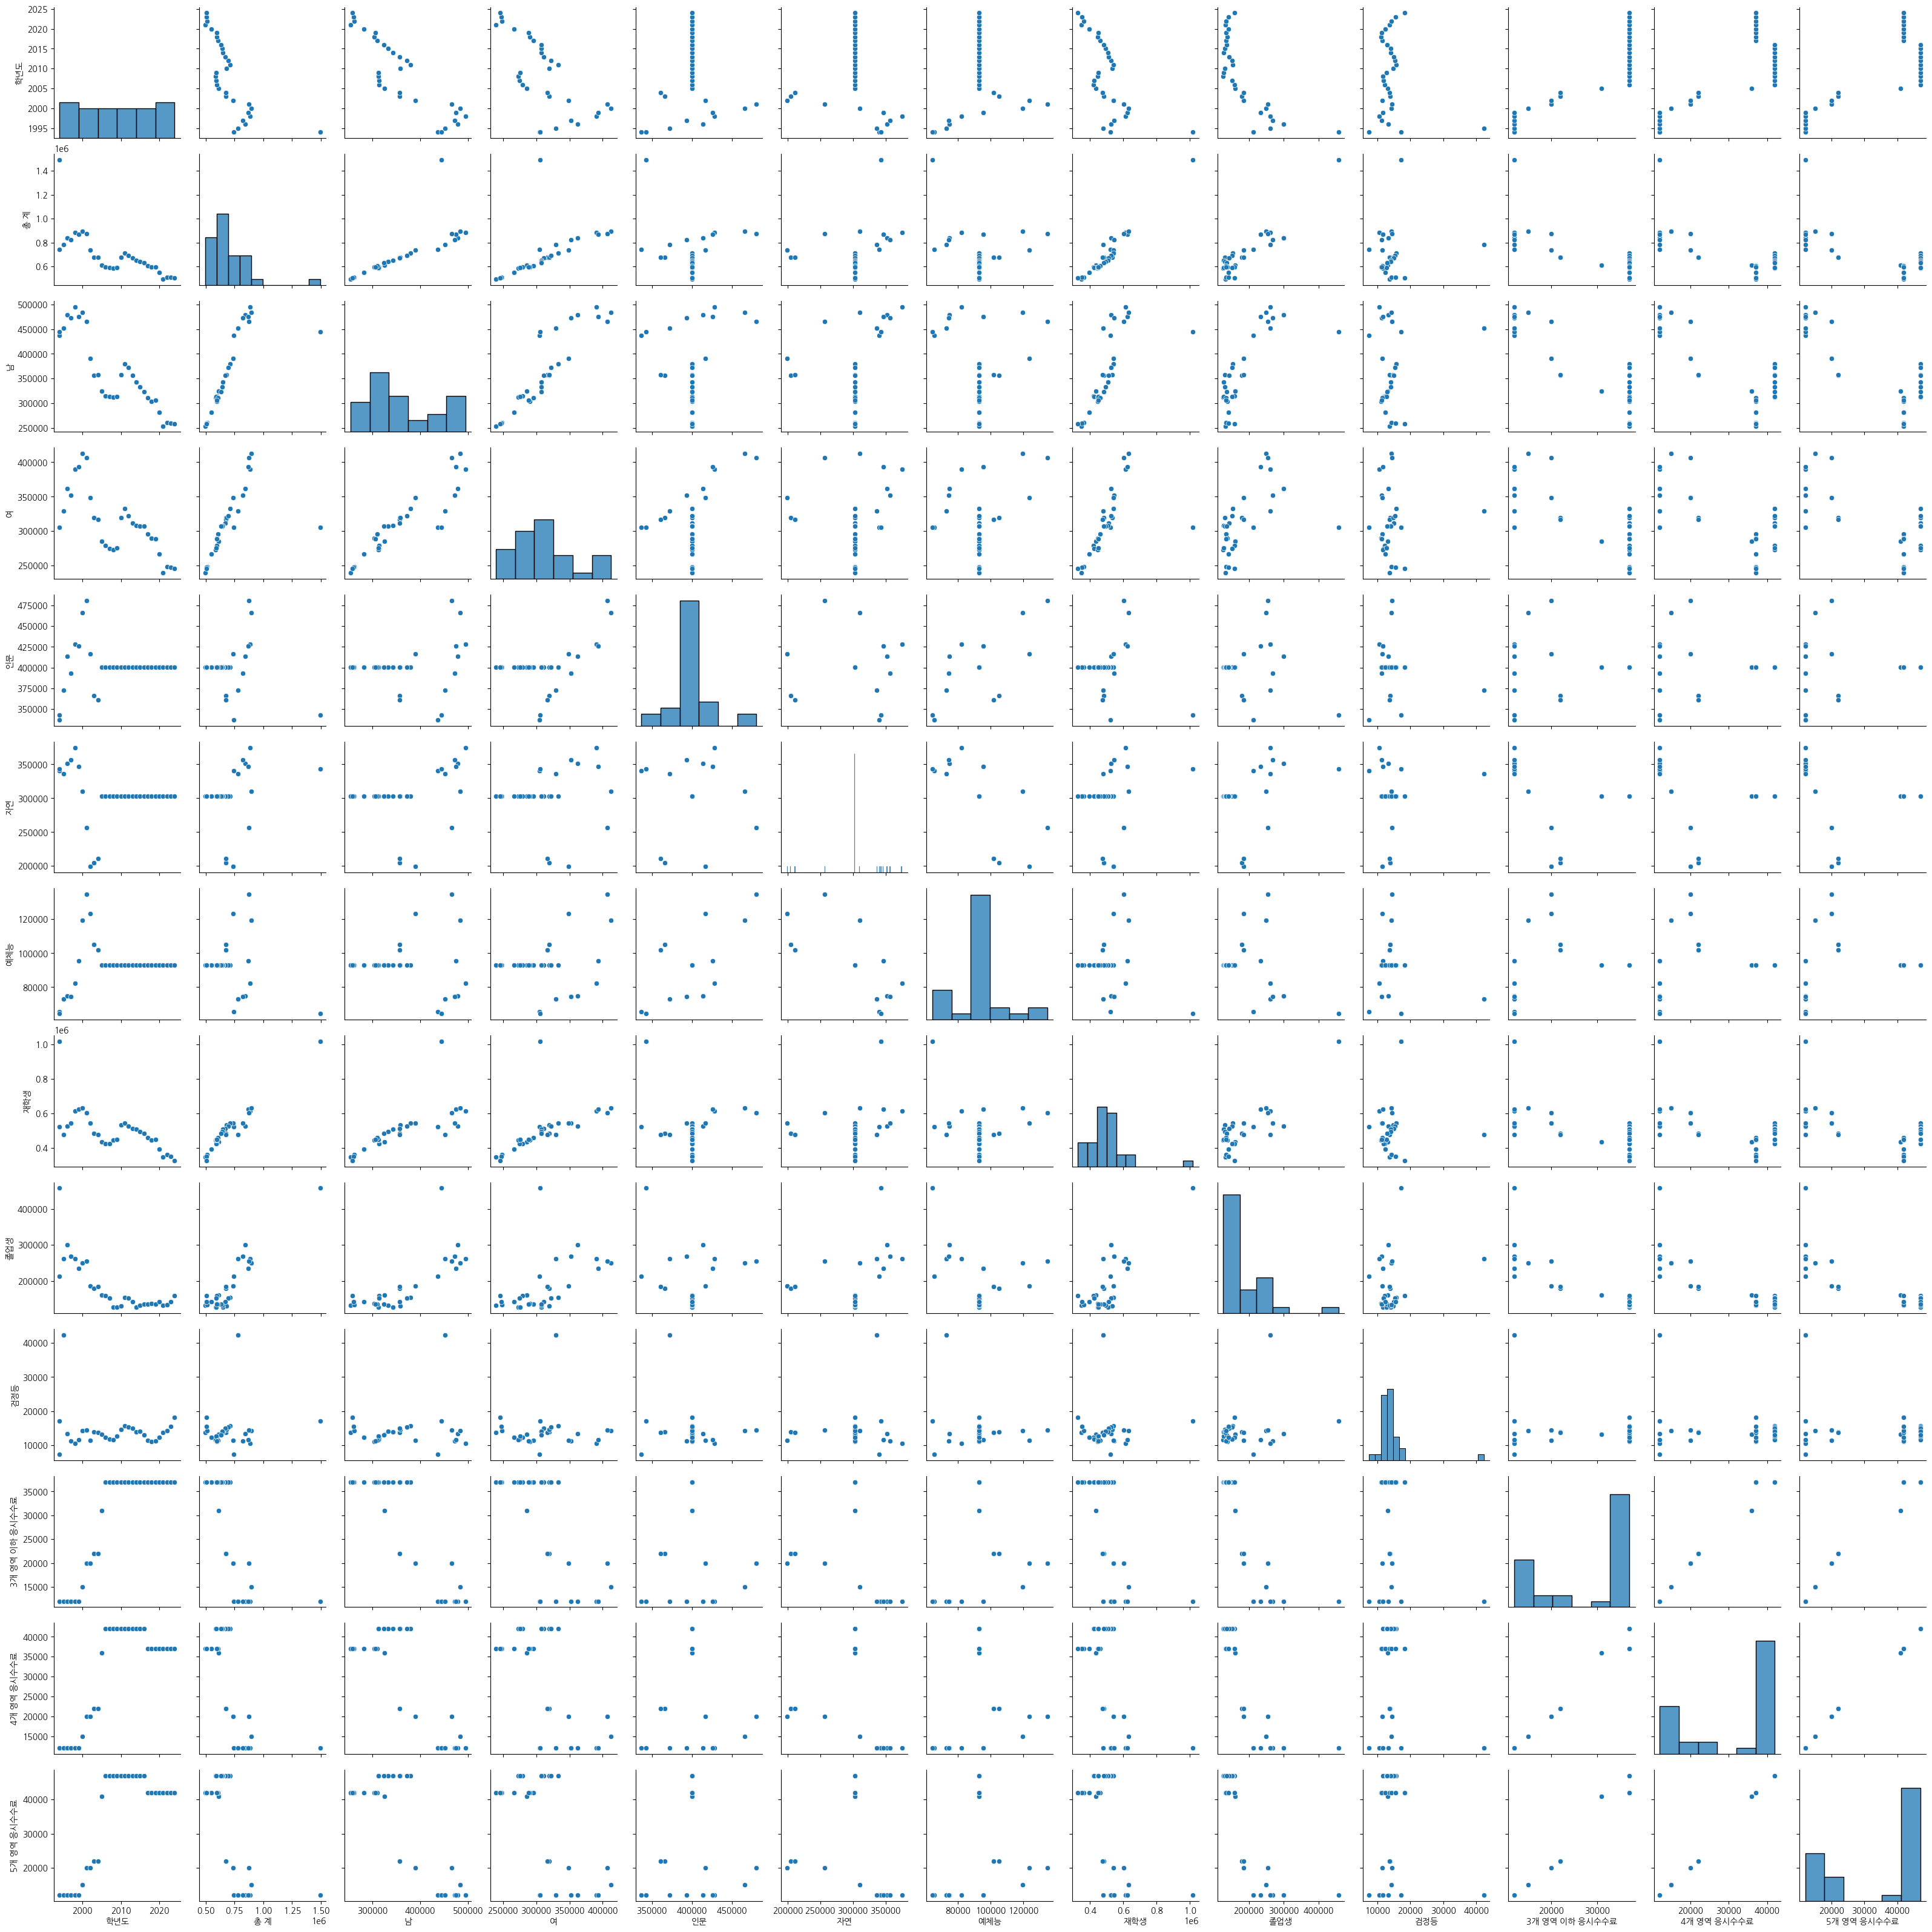

In [310]:
# seaborn을 통하여 pairplot 시각화
# 현재 데이터프레임의 모든 열 쌍에 대한 산점도와 히스토그램을 시각화한다

sns.pairplot(data)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/Users/alphastation/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


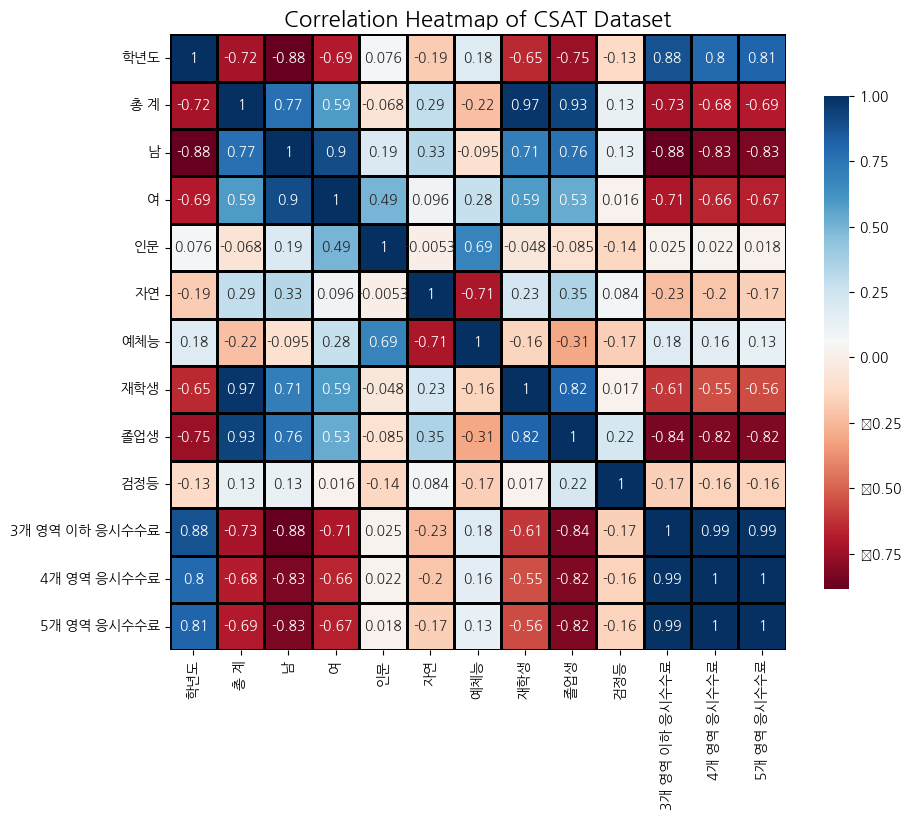

In [311]:
# seaborn을 통하여 heatmap 시각화
# 상관계수 행렬, 각 변수 간의 선형적 관계를 시각적으로 표시

correlation_matrix = data.corr()
plt.figure(figsize=(10, 8)) 
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', square=True,
            linewidths=1, linecolor='black', cbar_kws={"shrink": 0.8})

plt.title('Correlation Heatmap of CSAT Dataset', fontsize=16)
plt.show()

----------

### <mark>3. linear regression 모델을 적용하여 추후 상황 예측</mark>
- 2024.07.06.

본 과정에서는 scikit-learn을 이용한 회귀 모델링을 진행 후 추후 수치를 예측한다. 사용할 attribute는 '학년도', '총 계', '재학생', '졸업생', '검정등'으로, 미래 대수능에 접수하는 인원이 각각 어떤 양상을 펼치는 지를 선형 회귀를 이용하여 예측한다. 전년도의 데이터를 활용하지 아니하며, 기존에 비해 재학생 접수자가 증가한 2010년대부터의 데이터를 통해 모델링한다.

- **모델** : linear regression
- **모델링 순서** : 총 계 (regr1), 재학생 (regr2), 졸업생 (regr3), 검정등 (regr4)
- **가설**
    - 1) 저출산의 영향으로 총 접수자는 해가 거듭함에 따라 줄어들 것이다. 
    - 2) 저출산의 영향으로 재학생 접수자는 해가 거듭함에 따라 줄어들 것이다.
    - 3) 의대 쏠림 현상 및 희망대학 진학률이 적어지는 까닭에 졸업생 접수자는 재학생 접수자보다 많아질 것이다.
    - 4) 저학년부터 최상위권 대학을 진학하고자 하는 수험생들이 많아지는 까닭에 검정고사 등 접수자는 재학생 접수자보다 많아질 것이다.

In [312]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model   

In [313]:
# 전에 사용하였던 year, current, graduate, GED, total 변수를 다시 재활용한다.

print (year.describe)
print (current.describe)
print (graduate.describe)
print (GED.describe)
print (total.describe)

# 2010년도부터의 데이터 사용

year = year[year > 2009]
current = current.loc[16:]
graduate = graduate.loc[16:]
GED = GED.loc[16:]
total = total.loc[16:]

print (year.shape, current.shape, graduate.shape, GED.shape, total.shape)

<bound method NDFrame.describe of 1     1994
2     1995
3     1996
4     1997
5     1998
6     1999
7     2000
8     2001
9     2002
10    2003
11    2004
12    2005
13    2006
14    2007
15    2008
16    2009
17    2010
18    2011
19    2012
20    2013
21    2014
22    2015
23    2016
24    2017
25    2018
26    2019
27    2020
28    2021
29    2022
30    2023
31    2024
Name: 학년도, dtype: int64>
<bound method NDFrame.describe of 0     1018423
1      477960
2      526833
3      545023
4      613376
5      623130
6      631745
7      603238
8      541662
9      482089
10     476129
11     435538
12     422310
13     425396
14     446597
15     448472
16     532436
17     541880
18     526418
19     510972
20     509081
21     495027
22     482054
23     459342
24     444873
25     448111
26     394024
27     346673
28     360710
29     350239
30     326646
Name: 재학생, dtype: int64>
<bound method NDFrame.describe of 0     457285
1     261492
2     300482
3     268044
4     261424
5     23

#### <mark>3-1) 총 접수자 수를 linear regression으로 모델링, fit, evaluation</mark>

In [314]:
# train dataset : test dataset = 8 : 2로 split

train_X, test_X, train_y, test_y = train_test_split(year, total, test_size=0.2)

In [315]:
# 모델링

regr1 = linear_model.LinearRegression()

In [316]:
# fit

# fit하기 전 reshape을 통하여 (-1, 1)로 차원 변경
train_X = np.reshape(train_X, (-1, 1))

regr1.fit (train_X, train_y)

LinearRegression()

In [317]:
# evaluation

test_X = np.reshape(test_X, (-1, 1))

regr1.score(test_X, test_y)

0.7965357736598875

#### <mark>3-2) 재학생 접수자 수를 linear regression으로 모델링, fit, evaluation</mark>

In [318]:
# train dataset : test dataset = 8 : 2로 split

train_X, test_X, train_y, test_y = train_test_split(year, current, test_size=0.2)

In [319]:
# 모델링

regr2 = linear_model.LinearRegression()

In [320]:
# fit

# fit하기 전 reshape을 통하여 (-1, 1)로 차원 변경
train_X = np.reshape(train_X, (-1, 1))

regr2.fit (train_X, train_y)

LinearRegression()

In [321]:
# evaluation

test_X = np.reshape(test_X, (-1, 1))

regr2.score(test_X, test_y)

0.6659213172891899

#### <mark>3-3) 졸업생(n수생) 접수자 수를 linear regression으로 모델링, fit, evaluation</mark>

In [322]:
# train dataset : test dataset = 8 : 2로 split

train_X, test_X, train_y, test_y = train_test_split(year, graduate, test_size=0.2)

In [323]:
# 모델링

regr3 = linear_model.LinearRegression()

In [324]:
# fit

# fit하기 전 reshape을 통하여 (-1, 1)로 차원 변경
train_X = np.reshape(train_X, (-1, 1))

regr3.fit (train_X, train_y)

LinearRegression()

In [325]:
# evaluation

test_X = np.reshape(test_X, (-1, 1))

regr3.score(test_X, test_y)

-23.355566536856035

#### <mark>3-4) 검정고시 등 접수자 수를 linear regression으로 모델링, fit, evaluation</mark>


In [326]:
# train dataset : test dataset = 8 : 2로 split

train_X, test_X, train_y, test_y = train_test_split(year, GED, test_size=0.2)

In [327]:
# 모델링

regr4 = linear_model.LinearRegression()

In [328]:
# fit

# fit하기 전 reshape을 통하여 (-1, 1)로 차원 변경
train_X = np.reshape(train_X, (-1, 1))

regr4.fit (train_X, train_y)

LinearRegression()

In [329]:
# evaluation

test_X = np.reshape(test_X, (-1, 1))

regr4.score(test_X, test_y)

-2.243971085153768

#### <mark>3-5) 향후 2030년도부터 2080년도까지 1년 단위로 각 접수자 수의 변화를 prediction, 시각화</mark>

In [330]:
# prediction을 위한 list를 준비한다.

pred = [[i] for i in range(2030, 2081)]
print (pred, end = ' ')

[[2030], [2031], [2032], [2033], [2034], [2035], [2036], [2037], [2038], [2039], [2040], [2041], [2042], [2043], [2044], [2045], [2046], [2047], [2048], [2049], [2050], [2051], [2052], [2053], [2054], [2055], [2056], [2057], [2058], [2059], [2060], [2061], [2062], [2063], [2064], [2065], [2066], [2067], [2068], [2069], [2070], [2071], [2072], [2073], [2074], [2075], [2076], [2077], [2078], [2079], [2080]] 

In [331]:
# 각 모델 (regr1, regr2, regr3, regr4)에 pred_list를 대입하여 예측한다.
# 예측 수행 및 1차원 배열로 변환

rst1 = regr1.predict(pred) # 전체 접수자 수
rst2 = regr2.predict(pred)  # 재학생 접수자 수
rst3 = regr3.predict(pred)  # 졸업생(n수생) 접수자 수
rst4 = regr4.predict(pred) # 검정고시 등 접수자 수

pred = np.array([compo[0] for compo in pred])

# DataFrame 생성
pred_df = pd.DataFrame({
    '연도': pred,
    '전체 접수자 수': rst1,
    '재학생 접수자 수': rst2,
    '졸업생(n수생) 접수자 수': rst3,
    '검정고시 등 접수자 수': rst4
})

pred_df

,연도,전체 접수자 수,재학생 접수자 수,졸업생(n수생) 접수자 수,검정고시 등 접수자 수
0,2030,398681.844652,236216.978229,145214.553969,15054.537803
1,2031,383170.405043,219953.702467,145560.185320,15107.299572
2,2032,367658.965433,203690.426705,145905.816672,15160.061341
3,2033,352147.525824,187427.150943,146251.448024,15212.823110
4,2034,336636.086214,171163.875181,146597.079376,15265.584879
5,2035,321124.646604,154900.599419,146942.710727,15318.346648
6,2036,305613.206995,138637.323657,147288.342079,15371.108417
7,2037,290101.767385,122374.047895,147633.973431,15423.870185
8,2038,274590.327776,106110.772134,147979.604782,15476.631954
9,2039,259078.888166,89847.496372,148325.236134,15529.393723


/var/folders/_z/gryfr07n59jgb3wrd062h1ym0000gn/T/ipykernel_8347/2028030905.py:36: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
/Users/alphastation/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


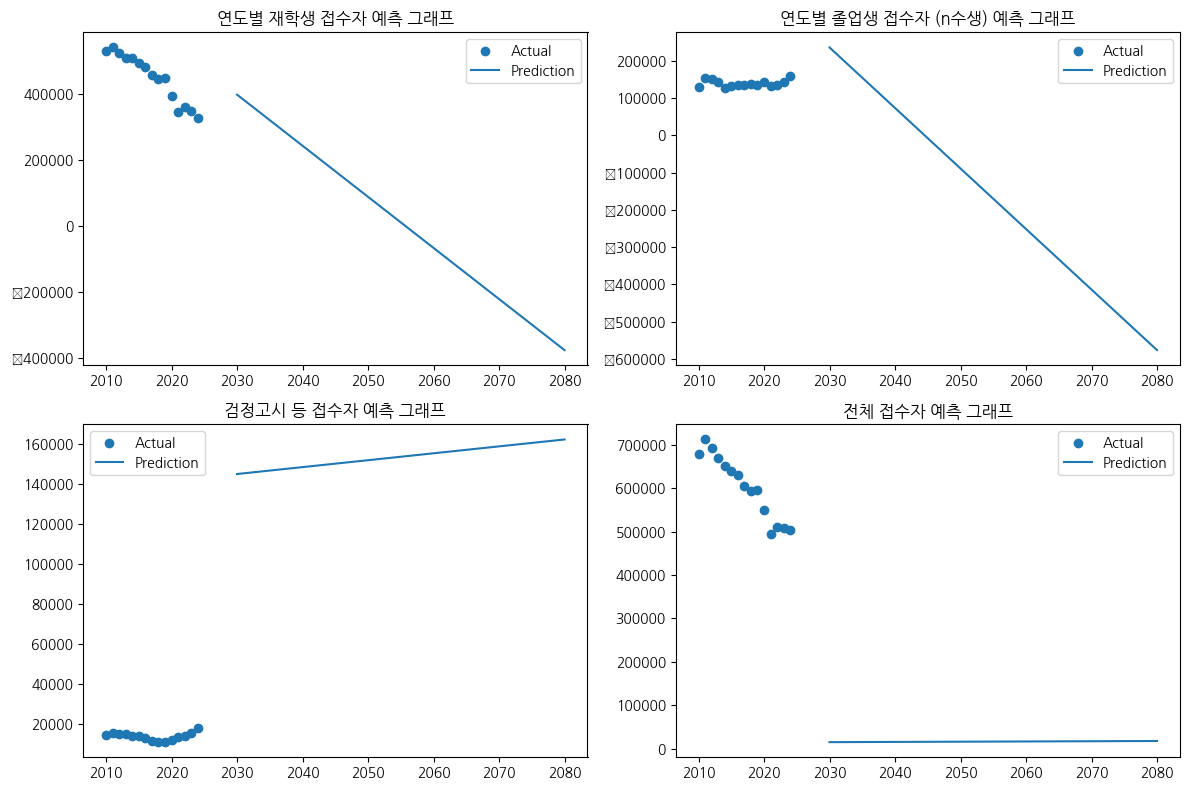

In [343]:
# scatter, line plot
# 아래는 subplot을 구성하여 2 by 2으로 표현
# 1행 1열은 재학생 접수자 수 scatter, prediction line, 1행 2열은 졸업생 접수자 수 scatter, prediction line 
# 2행 1열은 검정등 추이 수 scatter, prediction line, 2행 2열은 전체 접수자 수 scatter, prediction line

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Subplot 1: 재학생 접수자 수 scatter and prediction line
y = [regr1.coef_ * i + regr1.intercept_ for i in range(2030, 2081)] # 선형직선을 그리기 위함
axs[0, 0].scatter(year, current, label='Actual')
axs[0, 0].plot(pred, y, label='Prediction')
axs[0, 0].set_title('연도별 재학생 접수자 예측 그래프')
axs[0, 0].legend()

# Subplot 2: 졸업생 접수자 수 scatter and prediction line
y = [regr2.coef_ * i + regr2.intercept_ for i in range(2030, 2081)]
axs[0, 1].scatter(year, graduate, label='Actual')
axs[0, 1].plot(pred, y, label='Prediction')
axs[0, 1].set_title('연도별 졸업생 접수자 (n수생) 예측 그래프')
axs[0, 1].legend()

# Subplot 3: 검정고시 등 추이 수 scatter and prediction line
y = [regr3.coef_ * i + regr3.intercept_ for i in range(2030, 2081)]
axs[1, 0].scatter(year, GED, label='Actual')
axs[1, 0].plot(pred, y, label='Prediction')
axs[1, 0].set_title('검정고시 등 접수자 예측 그래프')
axs[1, 0].legend()

# Subplot 4: 전체 접수자 수 scatter and prediction line
y = [regr4.coef_ * i + regr4.intercept_ for i in range(2030, 2081)]
axs[1, 1].scatter(year, total, label='Actual')
axs[1, 1].plot(pred, y, label='Prediction')
axs[1, 1].set_title('전체 접수자 예측 그래프')
axs[1, 1].legend()

plt.tight_layout()
plt.show()

(5)번에서의 dataframe, 위 figure을 바탕으로 가설을 검증하면 아래와 같다.

- **1) 저출산의 영향으로 총 접수자는 해가 거듭함에 따라 줄어들 것이다. : 참**
    - 위의 dataframe을 보면 알 수 있듯이, 해를 거쳐가면서 전체 접수자 수는 음의 방향으로 내려가고 있다.
    - 위 plot에서는 X와 y의 scale이 너무 크다 보니 가시적으로 판단이 어렵다. 하지만 dataframe을 참고하여 이는 점점 우하향하고 있음을 확인 가능하다.
- **2) 저출산의 영향으로 재학생 접수자는 해가 거듭함에 따라 줄어들 것이다. : 참**
    - 위의 dataframe을 보았을 때 2043년도에서 44년도로 갈 때 폭발적인 감소가 이어진 것을 확인 가능하다.
    - 위 plot에서도 접수자의 감소를 확인 가능하다.
- **3) 의대 쏠림 현상 및 희망대학 진학률이 적어지는 까닭에 졸업생 접수자는 재학생 접수자보다 많아질 것이다. : 참**
    - 위 plot에서는 scale로 인한 가시적 확인의 어려움으로 파악할 수 없다.
    - dataframe에서 2036년도를 기준으로 재학생 접수자 수보다 졸업생(n수생) 접수자 수가 많아지는 것을 확인 가능하다.
- **4) 저학년부터 최상위권 대학을 진학하고자 하는 수험생들이 많아지는 까닭에 검정고시 등 접수자는 재학생 접수자보다 많아질 것이다. : 참**
    - 현재 pred를 2030년부터 2080년도까지로 설정하였고, 2043년도를 기점으로 재학생 접수자 수보다 검정고시 등 접수자 수가 많아지는 것을 알 수 있다.
- 다만, 2056년도의 예측 데이터를 바탕으로, 전체 접수자 수 예측값이 음수를 향해가고 있기 때문에 다양한 요인을 고려할 필요가 있음. 

-----

### <mark>4. 결론</mark>

본 데이터 분석은 대한민국의 중등교육의 현 상황 및 대학 진학의 어려움을 효과적으로 보여주고 있다. 해를 거듭할 수록 대학수학능력시험을 다시 준비하는 졸업생 및 검정고시 등 기타 접수자 수가 상대적으로 늘어나고, 그에 반하여 재학생 접수자의 수는 감소하고 있다. 대수능의 목적은 현역 수험생의 대학 진학이지만, 그와는 반대이자 모순적으로 역전되어 지금의 수치를 보이고 있는 것이다. 또한 전체적으로 접수자의 수가 감소하여 2056년에는 응시자 수가 0의 음의 방향으로 초월할 것임으로 예측하였다. 결국에는 각 대학별로 학생들을 유치할 수 없어 대학 운영은 오늘날보다 더욱 어려워질 것이며, 일명 '좀비 대학'(학생을 받을 수 있는 재정적 상황이 되지만 입학생 미달로 인하여 존속할 수 밖에 없는 상황)은 더욱 늘어날 것이다. 교육의 양극화는 지금보다 월등히 심해질 것임이 예측된다.
  
본 분석만으로는 이 현상의 원인을 정확하게 확인할 수 없다. 세부적인 요인을 확인하려면 이에 대한 향후 예측 모델을 필수적으로 구축하여야 하며, 아래와 같은 기법을 동원한 연구가 추가적으로 필요해 보인다.
- **ARIMA** : Auto Regressive Integrated Moving Average
    - 연도라는 시계열을 중심으로 원인으로 예측되는 node를 조합하여 패턴을 분석한다
- 데이터 내 추가적인 패턴을 찾기 위하여 **PCA와 같은 차원 축소 기법**을 이용할 수도 있겠다. 

본 상황을 긍정적으로 대응하기 위해 대학수학능력시험 접수자의 기하급수적 감소를 기초하여, 정부는 교육계를 대상으로 하는 프로그램 및 대학 관련 제도를 다시 정립하고, 각 대학을 적극적으로 통합하여 이를 해결할 것을 제안한다.

---------
<div style='float : right'><img src="./photo.png" width="100"/>

- **<mark>임규연 (가천대학교 컴퓨터공학부 학부과정)</mark>**
    - e-mail : lky473736@icloud.com
    - GitHub : https://github.com/lky473736
    - Homepage : https://lky473736.github.io/
    - 관심 분야 : 머신러닝, 최적화알고리즘, 선형대수, 교육공학
    
</div>